# Bank Marketing - All models check

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
bm = pd.read_csv("bank-additional-full.csv")

In [3]:
bm.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## EDA of dataset

In [4]:
bm.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
bm.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
bm.rename(columns = {"y" : "target",
                    "emp.var.rate" : "emp_var_rate",
                    "cons.price.idx" : "cons_price_idx",
                    "cons.conf.idx" : "cons_conf_idx",
                    "nr.employed" : "nr_employed"}, inplace = True)

In [7]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
target            41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

* the data is non-null
* There are several missing values in some categorical attributes, all coded with the "unknown" label

In [8]:
# type of job
print(bm['job'].unique())
print(bm['job'].nunique())
print(bm['job'].value_counts())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
12
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


In [9]:
# marital status
print(bm['marital'].unique())
print(bm['marital'].nunique())
print(bm['marital'].value_counts())

['married' 'single' 'divorced' 'unknown']
4
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


In [10]:
print(bm['education'].unique())
print(bm['education'].nunique())
print(bm['education'].value_counts())

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
8
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


In [11]:
# outcome of the previous marketing campaign
print(bm['poutcome'].unique())
print(bm['poutcome'].nunique())
print(bm['poutcome'].value_counts())

['nonexistent' 'failure' 'success']
3
nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


As per previuos campaign, 1373 customers have taken it (which is 3.33 % only)

In [12]:
# do he have default credit
print(bm['default'].unique())
print(bm['default'].nunique())
print(bm['default'].value_counts())

['no' 'unknown' 'yes']
3
no         32588
unknown     8597
yes            3
Name: default, dtype: int64


As per our dataset, only 3 customers have default credit loan

In [13]:
# if customer have housing loan
print(bm['housing'].unique())
print(bm['housing'].nunique())
print(bm['housing'].value_counts())

['no' 'yes' 'unknown']
3
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


As per our dataset, 21576 customers have housing loan

In [14]:
# if customer have personal loan
print(bm['loan'].unique())
print(bm['loan'].nunique())
print(bm['loan'].value_counts())

['no' 'yes' 'unknown']
3
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


As per our dataset, 6248 customers have personal loan

In [15]:
# mode of contact with customer.
print(bm['contact'].unique())
print(bm['contact'].nunique())
print(bm['contact'].value_counts())

['telephone' 'cellular']
2
cellular     26144
telephone    15044
Name: contact, dtype: int64


In [16]:
# last contact month of year
print(bm['month'].unique())
print(bm['month'].nunique())
print(bm['month'].value_counts())

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
10
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


In [17]:
# has the client subscribed a term deposit?
print(bm['target'].unique())
print(bm['target'].nunique())
print(bm['target'].value_counts())

['no' 'yes']
2
no     36548
yes     4640
Name: target, dtype: int64


As per our dataset, 4640 customers have taken term deposit

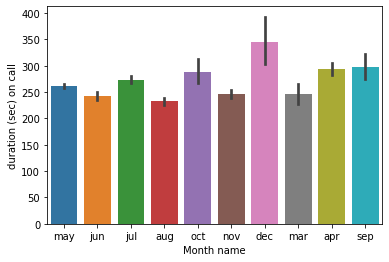

In [18]:
sns.barplot(x = 'month', y = 'duration', data = bm)
plt.ylabel('duration (sec) on call')
plt.xlabel('Month name')
plt.show()

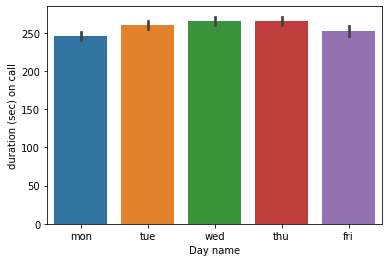

In [19]:
sns.barplot(x = 'day_of_week', y = 'duration', data = bm)
plt.ylabel('duration (sec) on call')
plt.xlabel('Day name')
plt.show()

old work**********old work******old work****old work**********old work******old work****old work**********old work******old work****old work**********old work******old work****old work**********old work******old work****old work**********

In [20]:
#bm.groupby('month')['y'].value_counts()
# bm.groupby('y')['month'].value_counts()
# bm.groupby('y')['pdays'].value_counts()

In [21]:
#def aveY(a,b):
#    a = (bm[bm['y'] == 'yes']['y'].count())
#    b = (bm['y'].count())
#    avg = a / b
#    return aveY

# bm.groupby('month').apply(lambda x : bm[bm['y'] == 'yes']['y'].count() / bm['y'].count())

In [22]:
# bm[bm['y'] == 'yes']['y'].count()
#bm['y'].count()

old work**********old work******old work****old work**********old work******old work****old work**********old work******old work****old work**********old work******old work****old work**********old work******old work****old work**********

In [23]:
table = pd.pivot_table(bm, index = 'target',values = ["poutcome", "campaign"], aggfunc={"poutcome" : "count", "campaign" : np.mean})
table

,campaign,poutcome
target,,
no,2.633085,36548
yes,2.051724,4640


In [24]:
table = pd.pivot_table(bm, index = 'target',values = ["poutcome", "duration"], aggfunc={"poutcome" : "count", "duration" : np.mean})
table

,duration,poutcome
target,,
no,220.844807,36548
yes,553.191164,4640


avrage duration spent on call for previous outcome, that have taken the 'term deposit' is 553 sec and those who haven't taken spends time around 220 sec..

It's obvious as the person who has to take term deposit will try to take much information on call.

In [25]:
bm.groupby('target')['poutcome'].value_counts()

target  poutcome   
no      nonexistent    32422
        failure         3647
        success          479
yes     nonexistent     3141
        success          894
        failure          605
Name: poutcome, dtype: int64

In [26]:
bm.groupby('target')['poutcome'].value_counts()

target  poutcome   
no      nonexistent    32422
        failure         3647
        success          479
yes     nonexistent     3141
        success          894
        failure          605
Name: poutcome, dtype: int64

In [27]:
#bm['poutcome'].value_counts()

#bm[(bm['poutcome'] == "success") & (bm['target'] == "yes")]['target'].count()

#bm[(bm['poutcome'] == "success")]['target'].count()

num = bm[(bm['poutcome'] == "success") & (bm['target'] == "yes")]['target'].count()
den = bm[(bm['poutcome'] == "success")]['target'].count()

success_conversion = (num / den) * 100
success_conversion

65.1128914785142

In [28]:
num = bm[(bm['poutcome'] == "failure") & (bm['target'] == "yes")]['target'].count()
den = bm[(bm['poutcome'] == "failure")]['target'].count()

failure_conversion = (num / den) * 100
failure_conversion

14.22859830667921

In [29]:
num = bm[(bm['poutcome'] == "nonexistent") & (bm['target'] == "yes")]['target'].count()
den = bm[(bm['poutcome'] == "nonexistent")]['target'].count()

nonexistent_conversion = (num / den) * 100
nonexistent_conversion

8.83221325534966

* 8.83% nonexistent cases, 14.2% cases and 65.11% cases of previous campaign have taken the term deposit

In [30]:
bm[(bm['poutcome'] == "success") & (bm['target'] == "yes")]['campaign'].value_counts()

1    487
2    261
3     99
4     26
6     10
5      9
7      2
Name: campaign, dtype: int64

In [31]:
bm[bm['target'] == "yes"]['campaign'].value_counts()

1     2300
2     1211
3      574
4      249
5      120
6       75
7       38
9       17
8       17
10      12
11      12
17       4
13       4
12       3
15       2
14       1
23       1
Name: campaign, dtype: int64

In [32]:
bm[bm['target'] == "yes"]['marital'].value_counts()

married     2532
single      1620
divorced     476
unknown       12
Name: marital, dtype: int64

In [33]:
bm[bm['target'] == "yes"]['job'].value_counts()

admin.           1352
technician        730
blue-collar       638
retired           434
management        328
services          323
student           275
self-employed     149
unemployed        144
entrepreneur      124
housemaid         106
unknown            37
Name: job, dtype: int64

In [34]:
bm[bm['target'] == "yes"]['education'].value_counts()

university.degree      1670
high.school            1031
professional.course     595
basic.9y                473
basic.4y                428
unknown                 251
basic.6y                188
illiterate                4
Name: education, dtype: int64

Those who have taken Term Deposit (target), maximum are married (2532), or may have admin job (1352) or may have university.degree (1670)

In [35]:
bm[bm['target'] == "yes"]['age'].value_counts().head()

31    220
33    210
30    202
29    186
32    184
Name: age, dtype: int64

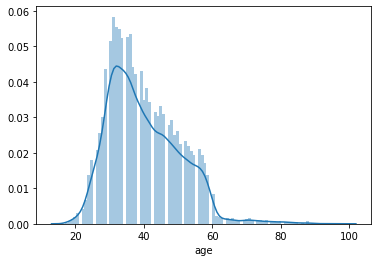

In [36]:
sns.distplot(bm['age'], bins = 100)

Maximum persons taking term deposit lies in age group :30-35

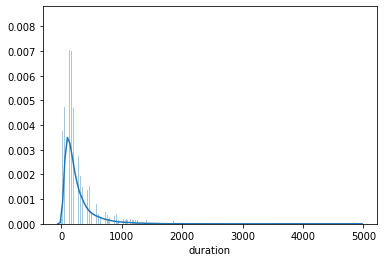

In [37]:
sns.distplot(bm['duration'], bins = 10000)

C:\Users\Nitish\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


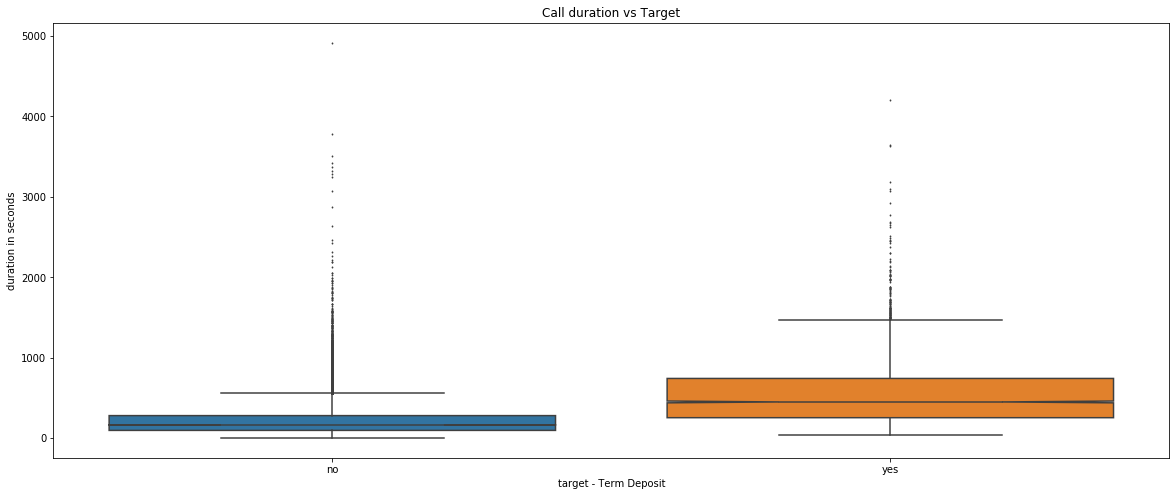

In [38]:
fig = plt.figure(figsize=(20,8))
sns.boxplot(bm['target'], bm['duration'],fliersize=1,notch = True)
plt.xlabel("target - Term Deposit")
plt.ylabel("duration in seconds")
plt.title("Call duration vs Target")
fig.show()

In [39]:
print(bm['age'].max())
print(bm['age'].min())
print(bm['age'].count())

98
17
41188


creating a new age_range column to specify the age pattern better

In [40]:
def round_age(value) : 
    if value >= 17 and value < 27 :
        return "youngster"
    elif value >= 27 and value < 36 :
        return "adult"
    elif value >= 36 and value < 45 :
        return "matured"
    elif value >= 45 and value < 60 :
        return "old"
    else :
        return "retired"

In [41]:
bm['age_group'] =bm['age'].apply(round_age)

In [42]:
bm['age_group'].value_counts()

adult        14149
matured      11741
old          11741
youngster     2364
retired       1193
Name: age_group, dtype: int64

We have already shown the age in distribution plot that age group of around 30-36 takes "Term deposit" the most.
We have just named the age-group section and it kinda of make sense also, if we want to use it as a column in machine learning modelling

#### Filling values in "Unknown" in categorical columns (job,	marital,	education,	default,	housing,	loan)


In [43]:
bm[bm['job'] == "unknown"]['marital'].value_counts()

married     234
single       74
divorced     13
unknown       9
Name: marital, dtype: int64

In [44]:
bm[bm['marital'] == "married"]['job'].value_counts()

blue-collar      6687
admin.           5253
technician       3670
services         2294
management       2089
retired          1274
entrepreneur     1071
self-employed     904
housemaid         777
unemployed        634
unknown           234
student            41
Name: job, dtype: int64

In [45]:
bm.replace(to_replace = 'unknown', value = np.NaN, inplace = True)

In [46]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
age               41188 non-null int64
job               40858 non-null object
marital           41108 non-null object
education         39457 non-null object
default           32591 non-null object
housing           40198 non-null object
loan              40198 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
target            41188 non-null object
age_group         41188 non-null object
dtypes: flo

In [47]:
bm.dropna(inplace = True)

In [48]:
bm.shape

(30488, 22)

we have dropped every row that contained "unknown"

### Making of final dataset for modelling

In [49]:
bm.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,old
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,matured
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,matured
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,old
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,old


In [50]:
bm.shape

(30488, 22)

In [51]:
bm_data = bm.copy()

In [52]:
bm_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,old
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,matured
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,matured
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,old
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,old


In [53]:
bm_data.shape

(30488, 22)

In [54]:
bm_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'target', 'age_group'],
      dtype='object')

In [55]:
bm_data.drop(["age", "contact", "day_of_week", "duration", "campaign", "pdays", "previous", 'emp_var_rate', 'cons_price_idx','cons_conf_idx', 'euribor3m', 'nr_employed'], axis = 1, inplace = True)

In [56]:
bm_data.head()

,job,marital,education,default,housing,loan,month,poutcome,target,age_group
0,housemaid,married,basic.4y,no,no,no,may,nonexistent,no,old
2,services,married,high.school,no,yes,no,may,nonexistent,no,matured
3,admin.,married,basic.6y,no,no,no,may,nonexistent,no,matured
4,services,married,high.school,no,no,yes,may,nonexistent,no,old
6,admin.,married,professional.course,no,no,no,may,nonexistent,no,old


In [57]:
bm_data.shape

(30488, 10)

In [58]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
label = LabelEncoder()

In [59]:
bm_data['age_group'] = label.fit_transform(bm_data['age_group'])
bm_data['month'] = label.fit_transform(bm_data['month'])
bm_data['default'] = label.fit_transform(bm_data['default'])
bm_data['housing'] = label.fit_transform(bm_data['housing'])
bm_data['loan'] = label.fit_transform(bm_data['loan'])
bm_data['target'] = label.fit_transform(bm_data['target'])

In [60]:
pout = pd.get_dummies(bm_data['poutcome'], drop_first= True)
pout.head()

,nonexistent,success
0,1,0
2,1,0
3,1,0
4,1,0
6,1,0


In [61]:
edu = pd.get_dummies(bm_data['education'], drop_first= True)
edu.head()

,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,0,0,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,0,1,0,0,0
6,0,0,0,0,1,0


In [62]:
mart = pd.get_dummies(bm_data['marital'], drop_first= True)
mart.head()

,married,single
0,1,0
2,1,0
3,1,0
4,1,0
6,1,0


In [63]:
job = pd.get_dummies(bm_data['job'], drop_first= True)
job.head()

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0


In [64]:
bm_data.drop(["job", "marital", "education", "poutcome"], axis = 1, inplace = True)

In [65]:
bm_final = pd.concat([bm_data, job, edu, mart, pout], axis = 1)

In [66]:
bm_final.head()

,default,housing,loan,month,target,age_group,blue-collar,entrepreneur,housemaid,management,...,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,married,single,nonexistent,success
0,0,0,0,6,0,2,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,1,0,6,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,0,0,0,6,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,0,0,1,6,0,2,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6,0,0,0,6,0,2,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


# Machine learning model

# all models check

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

In [68]:
x = bm_final.drop("target", axis = 1)
y = bm_final['target']

In [69]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 111)

In [70]:
models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
#models_list.append(('SVM', SVC())) # It is taking 6.5 minutes here, so avoid for now
#models_list.append(('NB', GaussianNB()))
#models_list.append(('KNN', KNeighborsClassifier()))

In [71]:
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, random_state=123)
    start = time.time()
    cv_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

CART: 0.861214 (0.009902) (run time: 1.588920)


CART: 0.861747 (0.009667) (run time: 1.587592)

SVM: 0.884707 (0.009353) (run time: 379.391141)

NB: 0.461788 (0.025863) (run time: 0.425080)

KNN: 0.873309 (0.009584) (run time: 11.506061)

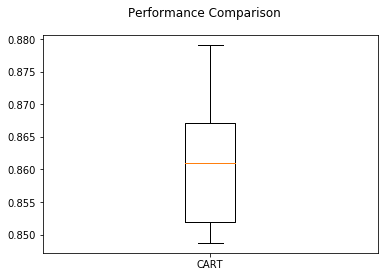

In [72]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From the initial run, it looks like CART, KNN and SVM performed the best given the dataset (all above 98% mean accuracy). GuassianNB has also given good erformance here. However, if we standardise the input dataset, it's performance should improve.

## Evaluation of algorithm on Standardised Data

The performance of the few machine learning algorithm could be improved if a standardised dataset is being used. The improvement is likely for all the models. I will use pipelines that standardize the data and build the model for each fold in the cross-validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data

In [73]:
import warnings

# Standardize the dataset
pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
#pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())]))) # It is taking 7.5 minutes here, very less as compared to 76 minutes before
#pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
#pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledCART: 0.861173 (0.008917) (run time: 2.449171)


ScaledCART: 0.861583 (0.008781) (run time: 2.590327)

ScaledSVM: 0.884748 (0.009479) (run time: 467.708383)

ScaledNB: 0.161542 (0.010953) (run time: 0.684875)

ScaledKNN: 0.876507 (0.008616) (run time: 59.230561)

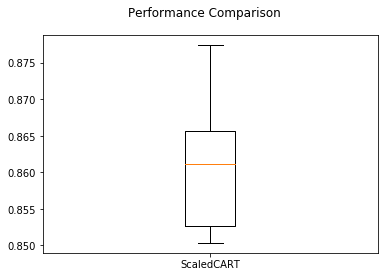

In [74]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Algorithm Tuning - Tuning SVM

We will focus on SVM for the algorithm tuning. We can tune two key parameter of the SVM algorithm - the value of C and the type of kernel. The default C for SVM is 1.0 and the kernel is Radial Basis Function (RBF). We will use the grid search method using 10-fold cross-validation with a standardized copy of the sample training dataset. We will try over a combination of C values and the following kernel types 'linear', 'poly', 'rbf' and 'sigmoid

In [75]:
from sklearn.model_selection import GridSearchCV
import time

In [76]:
'''
start = time.time()
#create a dictionary of all values we want to test
param_grid = { 'kernel':["rbf", 'linear'],'C': [10, 1, 0.1, 0.01], "gamma" : [10, 1, 0.1, 0.01]}
# SVC model
svc_model=SVC()
#use gridsearch to test all values
grid = GridSearchCV(svc_model, param_grid)
#fit model to data
grid.fit(xtrain, ytrain)
end = time.time()
print("time taken : ", (end - start))

print("\ngrid.best_params_ : \n", grid.best_params_)
print("\ngrid.best_estimator_ : \n", grid.best_estimator_)
print("\ngrid.best_index_ : \n", grid.best_index_)
print("\ngrid.best_score_ : \n", grid.best_score_)
'''


'\nstart = time.time()\n#create a dictionary of all values we want to test\nparam_grid = { \'kernel\':["rbf", \'linear\'],\'C\': [10, 1, 0.1, 0.01], "gamma" : [10, 1, 0.1, 0.01]}\n# SVC model\nsvc_model=SVC()\n#use gridsearch to test all values\ngrid = GridSearchCV(svc_model, param_grid)\n#fit model to data\ngrid.fit(xtrain, ytrain)\nend = time.time()\nprint("time taken : ", (end - start))\n\nprint("\ngrid.best_params_ : \n", grid.best_params_)\nprint("\ngrid.best_estimator_ : \n", grid.best_estimator_)\nprint("\ngrid.best_index_ : \n", grid.best_index_)\nprint("\ngrid.best_score_ : \n", grid.best_score_)\n'

time taken :  627.4655277729034

grid.best_params_ : 
 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [77]:
#predict = grid.predict(xtest)

In [78]:
#from sklearn import metrics

In [79]:
#print("\n metrics.confusion_matrix : \n", metrics.confusion_matrix(ytest, predict))
#print("\n metrics.classification_report : \n", metrics.classification_report(ytest, predict))
#print("\n metrics.auc : \n", metrics.accuracy_score(ytest, predict))

# Machine learning model with increased columns

In [80]:
bm_data = bm.copy()

In [81]:
bm_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,old
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,matured
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,matured
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,old
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,old


In [82]:
bm_data.shape

(30488, 22)

In [83]:
bm_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'target', 'age_group'],
      dtype='object')

In [84]:
bm_data.drop(["age", "contact", "day_of_week", "duration", "campaign", "pdays", "previous", 'emp_var_rate', 'euribor3m', 'nr_employed'], axis = 1, inplace = True)

In [85]:
bm_data.head()

,job,marital,education,default,housing,loan,month,poutcome,cons_price_idx,cons_conf_idx,target,age_group
0,housemaid,married,basic.4y,no,no,no,may,nonexistent,93.994,-36.4,no,old
2,services,married,high.school,no,yes,no,may,nonexistent,93.994,-36.4,no,matured
3,admin.,married,basic.6y,no,no,no,may,nonexistent,93.994,-36.4,no,matured
4,services,married,high.school,no,no,yes,may,nonexistent,93.994,-36.4,no,old
6,admin.,married,professional.course,no,no,no,may,nonexistent,93.994,-36.4,no,old


In [86]:
bm_data.iloc[:, 8:10] = scaler.fit_transform(bm_data.iloc[:, 8:10])

In [87]:
bm_data.shape

(30488, 12)

In [88]:
bm_data['age_group'] = label.fit_transform(bm_data['age_group'])
bm_data['month'] = label.fit_transform(bm_data['month'])
bm_data['default'] = label.fit_transform(bm_data['default'])
bm_data['housing'] = label.fit_transform(bm_data['housing'])
bm_data['loan'] = label.fit_transform(bm_data['loan'])
bm_data['target'] = label.fit_transform(bm_data['target'])

In [89]:
pout = pd.get_dummies(bm_data['poutcome'], drop_first= True)
pout.head()

,nonexistent,success
0,1,0
2,1,0
3,1,0
4,1,0
6,1,0


In [90]:
edu = pd.get_dummies(bm_data['education'], drop_first= True)
edu.head()

,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,0,0,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,0,1,0,0,0
6,0,0,0,0,1,0


In [91]:
mart = pd.get_dummies(bm_data['marital'], drop_first= True)
mart.head()

,married,single
0,1,0
2,1,0
3,1,0
4,1,0
6,1,0


In [92]:
job = pd.get_dummies(bm_data['job'], drop_first= True)
job.head()

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0


In [93]:
bm_data.drop(["job", "marital", "education", "poutcome"], axis = 1, inplace = True)

In [94]:
bm_final = pd.concat([bm_data, job, edu, mart, pout], axis = 1)

In [95]:
bm_final.head()

,default,housing,loan,month,cons_price_idx,cons_conf_idx,target,age_group,blue-collar,entrepreneur,...,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,married,single,nonexistent,success
0,0,0,0,6,0.804095,0.877451,0,2,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,1,0,6,0.804095,0.877451,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
3,0,0,0,6,0.804095,0.877451,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
4,0,0,1,6,0.804095,0.877451,0,2,0,0,...,0,0,1,0,0,0,1,0,1,0
6,0,0,0,6,0.804095,0.877451,0,2,0,0,...,0,0,0,0,1,0,1,0,1,0


In [96]:
x = bm_final.drop("target", axis = 1)
y = bm_final['target']

In [97]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 111)

In [98]:
from sklearn.model_selection import GridSearchCV
import time

In [ ]:

start = time.time()
#create a dictionary of all values we want to test
param_grid = { 'kernel':["rbf", 'linear'],'C': [10, 1, 0.1, 0.01], "gamma" : [10, 1, 0.1, 0.01]}
# SVC model
svc_model=SVC()
#use gridsearch to test all values
grid = GridSearchCV(svc_model, param_grid)
#fit model to data
grid.fit(xtrain, ytrain)
end = time.time()
print("time taken : ", (end - start))

print("\ngrid.best_params_ : \n", grid.best_params_)
print("\ngrid.best_estimator_ : \n", grid.best_estimator_)
print("\ngrid.best_index_ : \n", grid.best_index_)
print("\ngrid.best_score_ : \n", grid.best_score_)



C:\Users\Nitish\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


time taken :  633.3807590007782

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
predict = grid.predict(xtest)

In [ ]:
from sklearn import metrics

In [ ]:
print("\n metrics.confusion_matrix : \n", metrics.confusion_matrix(ytest, predict))
print("\n metrics.classification_report : \n", metrics.classification_report(ytest, predict))
print("\n metrics.auc : \n", metrics.accuracy_score(ytest, predict))